### <h1><center>**The Boolean Pandemic**</center></h1>
#### <center> **Machine Learning project** </center> 

   <center> Maren Leuthner - M20190134
    <br>
    Catarina Palha - M20190156
    <br>
    Mafalda Zúquete - M20190257
    <br>
    Pedro Carvalho - M20190417</center>


### Methodology 

* [1. Inroduction](#intro)
    * [1.1 About the data](#data)
    
    
* [2. First Look into the data](#look)
    * [2.1 Adding variables](#var)
    

* [3. Preprocessing](#pre)
    * [3.1 Replacing NaN values](#nan)
    * [3.2 Outliers](#out)
    * [3.3 Feature Selection](#featureselc)
    * [3.4 Baseline](#base)    
    
    
* [4. Modeling](#model)
    * [4.1 Cross Validation](#cross)
    * [4.2 The Model](#chosen)
    * [4.3 Other Models](#others)
    * [4.4 Train the Model](#train)
  
  
* [5. Prepare Test Set](#test)

### 1. Introduction

On January 1st, 2020, an epidemy was originated in Albuquerque, in New Mexico state, and spread on the
following days to Santa Fe and Taos. It is estimated that the epidemy has already affected more than 1000
people at the end of February, with a mortality rate of more than 50%.

***GOAL: What are the people more likely to survive to the boolean pandemic?***


#### 1.1. About the data

`Patient_ID` The unique identifier of the patient<br>
`Family_Case_ID` The family identification<br>
`Severity`The severity of the disease, where 1 is the lowest and 3 the highest severity<br>
`Name`The name of the patient<br>
`Birthday_year`The year of birthday of the patient<br>
`Parents_Siblings_Infected` The number of parents and/or siblings infected<br>
`Partner_Children_Infected`The number of partner and/or children infected<br>
`Medical_Expenses_Family`The medical expenses associated to try to contain the epidemy on the family<br>
`Medical_Tent` The medical tent where the patient is / was lodged<br>
`City` The original city of the patient<br>
`Deceased` Flag if the patient deceased or not with the virus (0 = No, 1 = Yes)<br>

In [1]:
import pandas as pd
import numpy as np

import warnings
#warnings.filterwarnings("ignore")

### 2. First Look into the data

In [2]:
df = pd.read_csv('train.csv')

We need:

1. Label Enconding

2. Adding Variables

3. Replacement NaN values

In [3]:
df.head()

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,Deceased
0,1,4696,3,Miss Linda Betty,NaN,0,0,225,NaN,Santa Fe,1
1,2,21436,1,Ms. Ramona Elvira,1966.0,0,1,1663,NaN,Albuquerque,0
2,3,7273,3,Mr. Mario Vernon,1982.0,0,0,221,NaN,Santa Fe,1
3,4,8226,3,Mr. Hector Joe,1997.0,0,0,220,NaN,Santa Fe,1
4,5,19689,3,Ms. Jennie Debra,1994.0,0,0,222,NaN,Santa Fe,0


Dimension: 900 rows, 11 columns

In [4]:
df.shape

(900, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Patient_ID                         900 non-null    int64  
 1   Family_Case_ID                     900 non-null    int64  
 2   Severity                           900 non-null    int64  
 3   Name                               900 non-null    object 
 4   Birthday_year                      723 non-null    float64
 5   Parents or siblings infected       900 non-null    int64  
 6   Wife/Husband or children infected  900 non-null    int64  
 7   Medical_Expenses_Family            900 non-null    int64  
 8   Medical_Tent                       198 non-null    object 
 9   City                               898 non-null    object 
 10  Deceased                           900 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 77.5+ KB


No duplicates.

In [6]:
df.duplicated().sum()

0

Need to:

1. Drop Medical_Expenses_Family

2. Use rule to replace Birthday_year: Look at the title of the pacient

In [7]:
df.isnull().sum()

Patient_ID                             0
Family_Case_ID                         0
Severity                               0
Name                                   0
Birthday_year                        177
Parents or siblings infected           0
Wife/Husband or children infected      0
Medical_Expenses_Family                0
Medical_Tent                         702
City                                   2
Deceased                               0
dtype: int64

#### 1.1. Adding variables: 

`Infected_per_Family` Sum of Parents or sibilings infected and Wife/Husband or children infected<br>
`Maritial_state` 1 if it is married 0 otherwise <br>
`Gender` 1 if it is female 0 otherwise <br>
`Is_young: `0 if the age is lower than 60, 1 otherwise<br>


In [8]:
df['Infected_per_Family'] = df['Parents or siblings infected'] + df['Wife/Husband or children infected']

df['Maritial_Status'] = 0

df['Gender'] = 0

df['Title'] = 0

In [9]:
for i in range(0, df.shape[0]):
    
    if df.Name[i].startswith('Miss'):
        df['Maritial_Status'][i] = 0
        df['Gender'][i] = 1
        df['Title'][i] = 'Miss'
        
    elif df.Name[i].startswith('Ms.'):
        df['Maritial_Status'][i] = 'unknown'
        df['Gender'][i] = 1
        df['Title'][i] = 'Ms.'
    
    elif df.Name[i].startswith('Mrs.'):
        df['Maritial_Status'][i] = 1
        df['Gender'][i] = 1
        df['Title'][i] = 'Mrs.'
        
    elif df.Name[i].startswith('Mr.'):
        df['Maritial_Status'][i] = 1
        df['Gender'][i] = 0
        df['Title'][i] = 'Mr.'
        
    elif df.Name[i].startswith('Master'):
        df['Maritial_Status'][i] = 0
        df['Gender'][i] = 0
        df['Title'][i] = 'Master'

<ipython-input-9-3deac2ec8a9b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Maritial_Status'][i] = 0
<ipython-input-9-3deac2ec8a9b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'][i] = 1
<ipython-input-9-3deac2ec8a9b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'][i] = 'Miss'
/home/cat/.local/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set

Let's replace the unknowns on Maritial_Status variable

In [10]:
df_title = df.groupby(['Family_Case_ID', 'City'])['Title'].apply(list).reset_index().head(50).sort_values('Family_Case_ID')
df_title.head()

,Family_Case_ID,City,Title
0,345,Taos,[Mr.]
1,981,Taos,[Miss]
2,1773,Santa Fe,[Mr.]
3,1794,Santa Fe,[Mr.]
4,1816,Santa Fe,[Mr.]


In [11]:
len_list = []

for i in list(df_title['Title']):
    len_list.append(len(i))
    
df_title['fam_length_per_city'] = len_list

Let's see where fam_legth_per_city is not 1

In [12]:
df_title[df_title['fam_length_per_city'] != 1]

,Family_Case_ID,City,Title,fam_length_per_city
5,1817,Albuquerque,"[Mr., Ms.]",2
18,2098,Santa Fe,"[Miss, Mr., Ms.]",3
20,2201,Santa Fe,"[Miss, Mr., Miss]",3
23,2309,Albuquerque,"[Miss, Miss, Ms., Miss]",4
25,2396,Santa Fe,"[Mr., Ms.]",2
35,2741,Albuquerque,"[Master, Mr.]",2
43,3060,Albuquerque,"[Miss, Mr.]",2
46,3165,Santa Fe,"[Mr., Ms.]",2
47,3196,Santa Fe,"[Ms., Master]",2


First, we're going to assume that:

`Family_Case_ID 1817` The Ms. is married<br>
`Family_Case_ID 2098` The Ms. is married<br>
`Family_Case_ID 2309` The Ms. is married<br>
`Family_Case_ID 2396` The Ms. is married <br>
`Family_Case_ID 3165` The Ms. is married<br>
`Family_Case_ID 3196` The Ms. is married<br>
`All the others` The Ms. is not married<br>


In [13]:
df[(df['Family_Case_ID'] == 1817) & (df['Title'] == 'Ms.') & (df['City'] == 'Albuquerque')]

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,Deceased,Infected_per_Family,Maritial_Status,Gender,Title
881,882,1817,1,Ms. Georgia Joann,1984.0,0,0,3798,C,Albuquerque,0,0,unknown,1,Ms.


In [14]:
df.loc[882,'Maritial_Status'] = 1

In [15]:
df[(df['Family_Case_ID'] == 2309) & (df['Title'] == 'Ms.') & (df['City'] == 'Albuquerque')]

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,Deceased,Infected_per_Family,Maritial_Status,Gender,Title
580,581,2309,3,Ms. Melinda Rhonda,1996.0,3,0,539,NaN,Albuquerque,0,3,unknown,1,Ms.


In [16]:
df.loc[580,'Maritial_Status'] = 1

In [17]:
df[(df['Family_Case_ID'] == 2098) & (df['Title'] == 'Ms.') & (df['City'] == 'Santa Fe')]

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,Deceased,Infected_per_Family,Maritial_Status,Gender,Title
509,510,2098,2,Ms. Stephanie Myrtle,1987.0,2,1,777,NaN,Santa Fe,0,3,unknown,1,Ms.


In [18]:
df.loc[509,'Maritial_Status'] = 1

In [19]:
df[(df['Family_Case_ID'] == 2396) & (df['Title'] == 'Ms.') & (df['City'] == 'Santa Fe')]

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,Deceased,Infected_per_Family,Maritial_Status,Gender,Title
721,722,2396,3,Ms. Karla Verna,1992.0,1,1,403,NaN,Santa Fe,1,2,unknown,1,Ms.


In [20]:
df.loc[721,'Maritial_Status'] = 1

In [21]:
df[(df['Family_Case_ID'] == 3165) & (df['Title'] == 'Ms.') & (df['City'] == 'Santa Fe')]

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,Deceased,Infected_per_Family,Maritial_Status,Gender,Title
457,458,3165,3,Ms. Dianne Regina,1996.0,0,1,444,NaN,Santa Fe,0,1,unknown,1,Ms.


In [22]:
df.loc[457,'Maritial_Status'] = 1

In [23]:
df[(df['Family_Case_ID'] == 3196) & (df['Title'] == 'Ms.') & (df['City'] == 'Santa Fe')]

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,Deceased,Infected_per_Family,Maritial_Status,Gender,Title
141,142,3196,3,Ms. Roxanne Faye,1993.0,1,0,349,E,Santa Fe,0,1,unknown,1,Ms.


In [24]:
df.loc[141,'Maritial_Status'] = 1

In [25]:
df['Maritial_Status'] = df['Maritial_Status'].replace('unknown', 0)

In [26]:
df.columns
df.head()

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,Deceased,Infected_per_Family,Maritial_Status,Gender,Title
0,1,4696,3,Miss Linda Betty,NaN,0,0,225,NaN,Santa Fe,1,0,0,1,Miss
1,2,21436,1,Ms. Ramona Elvira,1966.0,0,1,1663,NaN,Albuquerque,0,1,0,1,Ms.
2,3,7273,3,Mr. Mario Vernon,1982.0,0,0,221,NaN,Santa Fe,1,0,1,0,Mr.
3,4,8226,3,Mr. Hector Joe,1997.0,0,0,220,NaN,Santa Fe,1,0,1,0,Mr.
4,5,19689,3,Ms. Jennie Debra,1994.0,0,0,222,NaN,Santa Fe,0,0,0,1,Ms.


### 3. Preprocessing

#### 3.1 Replacing Nulls

There were nulls values in the columns Birthday_year, City and Medical_tent.

- **Birthday_year:** 117 (13% of the data)
- **Medical_Tent:** 702 (78% of the data)
- **City:** 2



***City replacement:***

On the dataframe with the NaN values we can see that the Family_Case_ID is the same for both patients. Therefore, we'll replace the values with the mode.

In [27]:
df_city_nan = df[df['City'].isnull()]
df_city_nan

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,Deceased,Infected_per_Family,Maritial_Status,Gender,Title
49,50,23155,1,Ms. Elizabeth Teri,1958.0,0,0,2240,B,NaN,0,0,0,1,Ms.
530,531,23155,1,Ms. Tricia Kathryn,1982.0,0,0,2240,B,NaN,0,0,0,1,Ms.


In [28]:
df[df['Family_Case_ID'] == 23155] #there is only these two, therefore replace in the mode

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,Deceased,Infected_per_Family,Maritial_Status,Gender,Title
49,50,23155,1,Ms. Elizabeth Teri,1958.0,0,0,2240,B,NaN,0,0,0,1,Ms.
530,531,23155,1,Ms. Tricia Kathryn,1982.0,0,0,2240,B,NaN,0,0,0,1,Ms.


In [29]:
mode = df['City'].mode()
mode

0    Santa Fe
dtype: object

In [30]:
df['City'] = df['City'].fillna('Santa Fe')

array(['Santa Fe', 'Albuquerque', 'Taos'], dtype=object)

***Encoding City***

`Albuquerque:` 0<br>
`Santa Fe:` 1  <br>
`Taos:` 2   <br>

In [37]:
from sklearn import preprocessing

In [38]:
city = preprocessing.LabelEncoder()
city.fit(df['City'])
df['City'] = city.transform(df['City'])

In [39]:
df['City'].unique()

array([1, 0, 2])

***Birthday_year Replacement***

So, we decided to give random numbers based on Maritial_Status and Title:

The marrige average for 2019 in the USA to women was 27y and to men 29y.


`Mrs. and Ms. married` random number between 2002 and 1940<br>
`Mr.` random number between 1991 and 1940<br>
`Master` random number between 2008 and 2019<br>
`Ms. not married` random number between 2002 and 1940<br>
`Miss if child` random number between 2008 and 2019<br>
`Miss if not child` random number between 2008 and 1940<br>

In [40]:
birth_nan = df[(df.isna().any(axis=1))]

birth_nan['Title'].unique() #we only have miss and master missing, and some of them are children

array(['Miss', 'Ms.', 'Mr.', 'Master'], dtype=object)

In [41]:
df_grouped = birth_nan.groupby(['Family_Case_ID', 'City'])['Title'].apply(list).reset_index()

In [42]:
len_list = []

for i in list(df_grouped['Title']):
    len_list.append(len(i))
    
df_grouped['fam_length_per_city'] = len_list

We're going to assume that these misses are children so we must replace with a number between 2008 and 2019.

In [43]:
df_grouped[df_grouped['fam_length_per_city'] != 1]

,Family_Case_ID,City,Title,fam_length_per_city
11,2098,1,"[Miss, Mr., Ms.]",3
13,2201,1,"[Miss, Mr., Miss]",3
16,2309,0,"[Miss, Miss, Ms., Miss]",4
18,2396,1,"[Mr., Ms.]",2
24,2741,0,"[Master, Mr.]",2
...,...,...,...,...
552,23426,1,"[Master, Miss, Master, Ms., Miss, Mr.]",6
562,24102,1,"[Master, Master, Miss, Ms.]",4
563,24166,1,"[Ms., Miss, Mr.]",3
570,24454,1,"[Miss, Mr.]",2


In [44]:
import random

In [45]:
df[(df['Title'] == 'Master') & (df['Birthday_year'].isna())]

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,Deceased,Infected_per_Family,Maritial_Status,Gender,Title
5,6,17598,2,Master Terrell Bob,NaN,0,0,0,NaN,1,1,0,0,0,Master
15,16,19174,3,Master Alfredo Marty,NaN,0,0,211,NaN,1,1,0,0,0,Master
26,27,4274,2,Master Elias Wilson,NaN,0,0,0,NaN,1,1,0,0,0,Master
27,28,22832,3,Master Jeremiah Billy,NaN,0,0,217,F,2,1,0,0,0,Master
32,33,19631,3,Master Matthew Guillermo,NaN,0,0,405,NaN,0,1,0,0,0,Master
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,856,13946,1,Master Glenn Darrell,NaN,0,0,994,C,1,0,0,0,0,Master
869,870,3539,3,Master Duane Dallas,NaN,0,0,423,NaN,1,1,0,0,0,Master
870,871,4275,3,Master Louis Elias,NaN,0,0,202,NaN,0,1,0,0,0,Master
871,872,11524,1,Master Bryan Vincent,NaN,0,0,0,NaN,1,1,0,0,0,Master


In [46]:
loop_list_master = list(df[(df['Title'] == 'Master') & (df['Birthday_year'].isna())].index)

In [47]:
for i in loop_list_master:
    
    #Insures that every row has different random numbers.
    
    df['Birthday_year'][i] = random.randint(2008,2019)

<ipython-input-47-e7295e7ecae2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Birthday_year'][i] = random.randint(2008,2019)


In [48]:
print(df['Birthday_year'][5])
print(df['Birthday_year'][15])
print(df['Birthday_year'][26])

2010.0
2017.0
2011.0


In [49]:
df = pd.merge(df, df_grouped, on = ['Family_Case_ID', 'City'], how = 'left')
df.shape

(900, 17)

In [50]:
loop_list_miss_children = list(df[(df['fam_length_per_city'] != 1) & (df['Birthday_year'].isna())].index)

In [51]:
for i in loop_list_miss_children:
    
    #Insures that every row has different random numbers.
    
    df['Birthday_year'][i] = random.randint(2008,2019)

<ipython-input-51-489fc2daceb4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Birthday_year'][i] = random.randint(2008,2019)


In [52]:
loop_list_miss_adult = list(df[(df['Title_x'] == 'Miss') & (df['Birthday_year'].isna())].index)

In [53]:
for i in loop_list_miss_adult:
    
    #Insures that every row has different random numbers.
    
    df['Birthday_year'][i] = random.randint(1940,2008)

<ipython-input-53-2eb200831366>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Birthday_year'][i] = random.randint(1940,2008)


***Encoding Is_young***

`Yes`: 1 <br>
`No:` 0 <br>

In [55]:
df['Age'] = 2020 - df['Birthday_year']

df['Is_young'] = [0 if df['Age'][i] >= 60 else 1 for i in range(0, df.shape[0])]

***Medical_Tent drop:***

We have 78% of the data missing here, isto is too much therefore we'll drop this column.

We're going to drop on this step the Name column as well.

In [56]:
df = df.drop(['Title_y', 'fam_length_per_city', 'Medical_Tent', 'Parents or siblings infected', 'Wife/Husband or children infected', 'Birthday_year'], axis = 1)

In [57]:
df = df.rename(columns={"City_x": "City", "Title_x": "Title"})

#### 3.2 Outliers

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

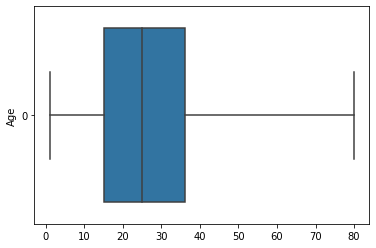

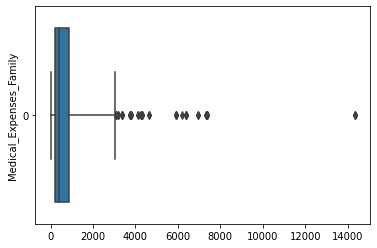

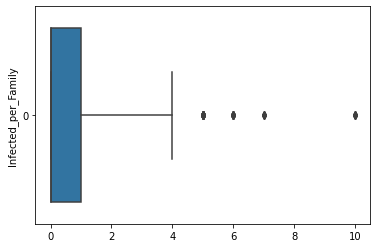

In [59]:
col = ['Age', 'Medical_Expenses_Family', 'Infected_per_Family']

for col in col:

    sns.boxplot(data = df[col], orient = "h", whis = 3.5)
    plt.ylabel(col)
    plt.show()

We have outliers in: Family_Case_ID, Parents or siblings infected, Wife/Husband or children infected and Medical_Expenses_Family

In [60]:
def zscore(series):
    """Returns the Z score"""
    return (series-series.mean()) / series.std()

In [61]:
out_1 = zscore(df['Medical_Expenses_Family'])
out_2 = zscore(df['Infected_per_Family'])

In [62]:
df_out = pd.DataFrame({'Medical_Expenses_Family': out_1, 'Infected_per_Family': out_2})

In [63]:
df_out.shape #Correct

(900, 2)

In [64]:
df_out_1 = df_out[(df_out['Medical_Expenses_Family'] > 4) | (df_out['Medical_Expenses_Family'] < -4)]
print(df_out_1.shape)
#20 outliers with threshold = 3
#11 outliers with threshold = 4
list_1 = list(df_out_1.index)

(11, 2)


In [65]:
df_out_2 = df_out[(df_out['Infected_per_Family'] > 4) | (df_out['Infected_per_Family'] < -4)]
print(df_out_2.shape)
#25 outliers with threshold = 3
#7 outliers with threshold = 4
list_2 = list(df_out_2.index)

(7, 2)


In [66]:
#all outliers together
list_all = list_1 + list_2

list_to_remove = []

for i in list_all:
  if i not in list_to_remove:
    list_to_remove.append(i)

In [67]:
for i in list_to_remove:
    df = df.drop([df.index[i]])

In [68]:
df = df.reset_index(drop = True)

We lost 2% of the data.

In [69]:
df.shape

(882, 13)

#### 3.3 Feature Selection

***Spliting the data set.***

`FEATURES`categorical and numerical<br>

`TARGET` categorical<br>

Once we have categorical and numerical input we need to divide the features in order to decide which numerical and categorical feature contributes the most:

1. Numerical Input/ Categorical Output: ANOVA

2. Categorical Input/ Categorical Output: Chi-Squared

3. RFE 

Dividing the features into Numerical and Categorical


In [70]:
df_numerical = df[['Age', 'Infected_per_Family', 'Medical_Expenses_Family']]

df_categorical = df[['Severity', 'City', 'Maritial_Status', 'Gender', 'Is_young']] 

target = df['Deceased']

***ANOVA***


`INPUT VARIABLES`: Numerical <br>
`OUPUT VARIABLE`: categorical <br>

In [71]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [72]:
X_numerical = df_numerical.to_numpy()

y_target = target.to_numpy()

In [73]:
# Create a SelectKBest object to select features with two best ANOVA F-Values
model = SelectKBest(f_classif, k = 'all')

# Apply the SelectKBest object to the features and target
best = model.fit_transform(X_numerical, y_target)
best

array([[6.500e+01, 0.000e+00, 2.250e+02],
       [5.400e+01, 1.000e+00, 1.663e+03],
       [3.800e+01, 0.000e+00, 2.210e+02],
       ...,
       [3.000e+01, 0.000e+00, 2.140e+02],
       [2.600e+01, 2.000e+00, 8.120e+02],
       [1.800e+01, 0.000e+00, 2.020e+02]])

In [74]:
model.pvalues_

array([5.44429247e-02, 6.67294265e-01, 2.40287772e-14])

In [75]:
scores = model.scores_
scores

array([ 3.70896218,  0.18490787, 60.17191729])

In [76]:
X_indices = np.arange(X_numerical.shape[-1])

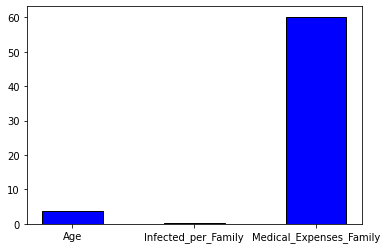

In [78]:
plt.bar(X_indices, scores, width = 0.5, color = 'blue', edgecolor = 'black')

x = df_numerical.columns

x_pos = [i for i, _ in enumerate(x)]

plt.xticks(x_pos, x)

plt.show()

***Chi-Squared***

`INPUT VARIABLES`: Categorical <br>
`OUPUT VARIABLE`: Categorical <br>

In [90]:
from sklearn.feature_selection import chi2

In [91]:
X_categorical = df_categorical.to_numpy()

In [92]:
model = SelectKBest(chi2, k = 4) 
best = model.fit_transform(X_categorical, y_target) 

In [93]:
scores = model.scores_
scores

array([2.94639690e+01, 4.31144444e+00, 6.63442871e+01, 1.64336530e+02,
       3.84799484e-03])

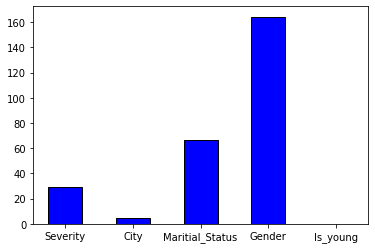

In [94]:
X_indices = np.arange(X_categorical.shape[-1])

plt.bar(X_indices, scores, width = 0.5, color = 'blue', edgecolor = 'black')

x = df_categorical.columns

x_pos = [i for i, _ in enumerate(x)]

plt.xticks(x_pos, x)

plt.show()

***RFE***

In [95]:
from sklearn.feature_selection import RFE

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [97]:
#no of features
nof_list=np.arange(1, 6) 

high_score = 0

#Variable to store the optimum features
nof = 0           

score_list =[]

models = [DecisionTreeClassifier(), RandomForestClassifier()]

m = []

for n in range(len(nof_list)):
    for model in models:
    
        X_train, X_test, y_train, y_test = train_test_split(X_numerical,y_target, test_size = 0.3, random_state = 0)
        
        rfe = RFE(model,nof_list[n])
        X_train_rfe = rfe.fit_transform(X_train,y_train)
        X_test_rfe = rfe.transform(X_test)
        model.fit(X_train_rfe, y_train)

        score = model.score(X_test_rfe, y_test)
        score_list.append(score)
        print(score)
        m.append(model)

        if(score > high_score):
            high_score = score
            nof = nof_list[n]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print("Using: put decision tree")

0.6716981132075471
0.6566037735849056
0.6188679245283019
0.6415094339622641
0.6
0.6716981132075471
0.6
0.6641509433962264
0.5924528301886792
0.6528301886792452
Optimum number of features: 1
Score with 1 features: 0.671698
Using: put decision tree


### 4. Baseline

The model with all a default

#### 4.1 Cross Validation

With Random Search/Grid Search

In [98]:
#Testing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

#Model
from sklearn.tree import DecisionTreeClassifier

#Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

***Normalizing the data***

In [99]:
scaler = StandardScaler()
#scaler = MinMaxScaler()
#scaler = RobustScaler()

***Features and target***

In [102]:
features = df.drop(['Patient_ID', 'Deceased', 'Name', 'Title'], axis = 1)
#print(features.columns)

target = df['Deceased']

***Parameter Space***

In [338]:
parameter_space = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 
                   'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                   'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
                   'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                   'random_state': [10, 42],
                   'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}

***Random Search***

In [339]:
model = DecisionTreeClassifier()

In [340]:
clf = RandomizedSearchCV(model, parameter_space, n_jobs = -1, random_state = 42)

***Cross validation***

In [341]:
kFold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 10)

In [16]:
accuracy = 0

# for each of the 5-fold splits
for (train, val) in kFold.split(features, target):
    # normalize the train and val sets
    
    X_train = scaler.fit_transform(features.iloc[train])
    X_val = scaler.transform(features.iloc[val])
    
    # fit the classifier to the train sets
    clf.fit(X_train, target[train])
    model = clf.best_estimator_
    model.fit(X_train, target[train])
    
    print(clf.best_params_)
    
    # predict the labels of the val set
    pred = model.predict(X_val)
    
    accuracy += accuracy_score(target[val], pred) * 100
    #recall += recall_score(target[val], pred, average = None) * 100
    
    # print a classification report and confusion matrix
    print(classification_report(y_true = target[val], y_pred = pred))
    print(confusion_matrix(y_true = target[val], y_pred = pred))

print("Accuracy Score: ", accuracy / 5)

NameError: name 'kFold' is not defined

#### 4.2 The model

In [343]:
clf.best_score_

0.8044750774148437

In [308]:
clf.best_params_

{'splitter': 'best',
 'random_state': 42,
 'min_samples_split': 11,
 'min_samples_leaf': 11,
 'max_leaf_nodes': 8,
 'max_depth': 3,
 'criterion': 'entropy'}

#### 4.3 Other Models

#### 4.4 Train the Model

In [103]:
X = df.drop(['Patient_ID', 'Deceased', 'Name', 'Title'], axis = 1)

y = df['Deceased']

In [104]:
X = scaler.fit_transform(X)

y = y.to_numpy()

In [105]:
clf.fit(X, y)

model = clf.best_estimator_
clf.best_params_

NameError: name 'clf' is not defined

In [106]:
model.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [107]:
model.score(X, y) #gave 93% on the test set, the less overfitted

0.9988662131519275

### 5. Preparing Test Set


In [98]:
df_ = pd.read_csv('test.csv')

In [102]:
df__ = df_.drop(['Guest_ID'], axis = 1)

In [103]:
X_test = scaler.fit_transform(df__)

X_test

array([[1.        , 0.        , 0.42465753, ..., 0.2       , 0.19683656,
        0.24861878],
       [1.        , 1.        , 0.53424658, ..., 0.6       , 0.        ,
        0.        ],
       [0.        , 1.        , 0.35616438, ..., 0.8       , 0.        ,
        0.        ],
       ...,
       [1.        , 1.        , 0.1369863 , ..., 0.2       , 0.        ,
        0.05893186],
       [0.        , 1.        , 0.21917808, ..., 0.8       , 0.26713533,
        0.30202578],
       [1.        , 1.        , 0.61643836, ..., 0.8       , 0.        ,
        0.00552486]])

In [104]:
pred = model.predict(X_test)

In [105]:
pred

array([0, 1, 1, ..., 1, 0, 1])

In [106]:
df_['Repeater'] = pred

In [107]:
test = df_[['Guest_ID', 'Repeater']]

In [108]:
test.to_csv('sampleSubmission.csv', index = False)